# Introdução

Alunos:
- Israel Nicolas de Souza Mendes - 537604
- Guilherme Sousa Lopes  - 535869
- Lucas Rodrigues Aragão - 538390

O dataset a seguir foi retirado do site Kaggle, e trata do preço de imóveis no estado de São Paulo, contendo as seguintes variáveis:
- Price: Representa o preço em reais, retirado do anúncio.
- Condo: Representao preço do condomínio a ser pago, caso o preço seja desconhecido o valor é 0.
- Size: O tamanho do imóvel em metros quadrados.
- Rooms: números de quartos para dormir(bedrooms)
- Toilets: número de banheiros.
- Suites: Número de quartos com banheiro próprio, suítes.
- Elevator: Binário que representa se possui ou não elevador(0 representa que não e 1 que sim)
- Furnished: Binário que indica se o imóvel é mobilhado ou não.
- Swimming Pool: Representa se o imóvel possui piscina(também é um binário)
- District: Representa a localização do imóvel, no formato Bairro/Cidade
- New: Representa se o valor o imóvel é recente ou não.
- Negociation Type: Indica o tipo de negócio para o qual o imóvel está sendo anunciado, "Rent" para alguel e "Sale" para venda.
- Property Type: Indica o tipo de propriedade do imóvel(Apartamento, casa etc)
- Latitude: Latitude do imóvel
- Longitude: Longitude do imóvel  

# Pré-processamento

In [1]:
from google.colab import drive

# Monta o Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
arquivo = '/content/drive/My Drive/Cienciadedados/sao-paulo-properties-april-2019.csv'

data = pd.read_csv(arquivo)

In [116]:
data

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,District,Negotiation Type,Property Type,Latitude,Longitude
0,930,220,47,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.543138,-46.479486
1,1000,148,45,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.550239,-46.480718
2,1000,100,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.542818,-46.485665
3,1000,200,48,2,2,1,1,0,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.547171,-46.483014
4,1300,410,55,2,2,1,1,1,0,0,0,Artur Alvim/São Paulo,rent,apartment,-23.525025,-46.482436
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13635,265000,420,51,2,1,0,1,0,0,0,0,Jabaquara/São Paulo,sale,apartment,-23.653004,-46.635463
13636,545000,630,74,3,2,1,2,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.648930,-46.641982
13637,515000,1100,114,3,3,1,1,0,0,1,0,Jabaquara/São Paulo,sale,apartment,-23.649693,-46.649783
13638,345000,48,39,1,2,1,1,0,1,1,0,Jabaquara/São Paulo,sale,apartment,-23.652060,-46.637046


In [117]:
data.isnull().sum()

Price               0
Condo               0
Size                0
Rooms               0
Toilets             0
Suites              0
Parking             0
Elevator            0
Furnished           0
Swimming Pool       0
New                 0
District            0
Negotiation Type    0
Property Type       0
Latitude            0
Longitude           0
dtype: int64

In [118]:
len(data)

13640

In [119]:
data_aux = data.copy()
data_aux['District'] = data_aux['District'].apply(lambda x: x.split('/')[1])
intermediario = data_aux.groupby('District').size()
intermediario

District
São Paulo    13640
dtype: int64

In [120]:
data['District'] = data['District'].apply(lambda x: x.split('/')[0])

In [121]:
data_aux = data.groupby('District').size()
data_aux

District
Alto de Pinheiros    230
Anhanguera            75
Aricanduva           128
Artur Alvim          158
Barra Funda          194
                    ... 
Vila Matilde         128
Vila Olimpia          84
Vila Prudente        221
Vila Sônia           134
Água Rasa            133
Length: 96, dtype: int64

É possível perceber a presença de 96 categorias para district. Querendo diminuir isso, fizemos uma mudança considerável. criamos os seguintes dicionários, em que dado um bairro presente no dataset, colocamos ele em sua devida região, sabendo que fatores socioecônomicos e geológicos são característicos para cada região da cidade de São Paulo.

In [122]:
c = 'centro'
zn = 'zona norte'
zl = 'zona leste'
zo = 'zona oeste'
zs = 'zona sul'

dicionario_centro = {
    'Bela Vista' :c,
    'Bom Retiro': c,
    'Cambuci' : c,
    'Consolação' : c,
    'Liberdade' : c,
    'República' : c,
    'Santa Cecília' : c,
    'Sé' : c
}

dicionario_zonaleste = {
    'Água Rasa': zl,
    'Iguatemi': zl,
    'Aricanduva' :zl,
    'Carrão': zl,
    'Vila Formosa' : zl,
    'Cidade Tiradentes': zl,
    'Ermelino Matarazzo': zl,
    'Ponte Rasa': zl ,
    'Guaianazes':zl, #é com s(guaianases), mas por algum motivo tava errado no dataset
    'Lajeado': zl,
    'Itaim Paulista': zl,
    'Vila Curuçá': zl,
    'Itaquera': zl,
    'Cidade Líder': zl,
    'José Bonifácio': zl,
    'Parque do Carmo': zl,
    'Mooca': zl,
    'Belém': zl,
    'Brás': zl,
    'Moóca': zl,
    'Pari': zl,
    'Tatuapé': zl,
    'Penha': zl,
    'Artur Alvim': zl,
    'Cangaíba': zl,
    'Penha': zl,
    'Vila Matilde': zl,
    'São Mateus': zl,
    'São Rafael': zl,
    'São Miguel': zl,
    'Jardim Helena':zl,
    'Vila Jacuí': zl,
    'Sapopemba': zl,
    'Vila Prudente': zl,
    'São Lucas': zl
}

dicionario_zonanorte = {
    'Casa Verde': zn,
    'Cachoeirinha': zn,
    'Limão': zn,
    'Brasilândia': zn,
    'Freguesia do Ó': zn,
    'Jaçanã': zn,
    'Tremembé': zn,
    'Perus': zn,
    'Anhanguera': zn,
    'Pirituba': zn,
    'Jaraguá': zn,
    'São Domingos': zn,
    'Santana': zn,
    'Tucuruvi': zn,
    'Mandaqui':zn,
    'Vila Maria': zn,
    'Vila Guilherme': zn,
    'Medeiros': zn #o correto eh vila medeiros
}

dicionario_zonaoeste = {
    'Vila Madalena':zo,
    'Butantã':zo,
    'Morumbi': zo,
    'Raposo Tavares': zo,
    'Rio Pequeno': zo,
    'Vila Sônia': zo,
    'Lapa': zo,
    'Barra Funda': zo,
    'Jaguara': zo,
    'Jaguaré': zo,
    'Perdizes': zo,
    'Vila Leopoldina': zo,
    'Pinheiros': zo,
    'Alto de Pinheiros': zo,
    'Itaim Bibi': zo,
    'Jardim Paulista': zo,
    'Pinheiros': zo
}

dicionario_zonasul = {
    'Vila Olimpia': zs,
    'Campo Limpo' : zs,
    'Capão Redondo': zs,
    'Vila Andrade': zs,
    'Cidade Dutra': zs,
    'Grajaú':zs,
    'Socorro': zs,
    'Cidade Ademar': zs,
    'Pedreira':zs,
    'Ipiranga':zs,
    'Sacomã':zs,
    'Jabaquara': zs,
    "M'Boi Mirim": zs,
    'Jardim Ângela': zs,
    'Jardim São Luis': zs,
    'Parelheiros':zs,
    'Marsilac':zs,
    'Santo Amaro':zs,
    'Campo Belo':zs,
    'Campo Grande':zs,
    'Santo Amaro':zs,
    'Moema':zs,
    'Saúde':zs,
    'Vila Mariana':zs,
    'Brooklin': zs,
    'Cursino': zs

}

data['District'] = data['District'].replace(dicionario_centro)
data['District'] = data['District'].replace(dicionario_zonaleste)
data['District'] = data['District'].replace(dicionario_zonanorte)
data['District'] = data['District'].replace(dicionario_zonaoeste)
data['District'] = data['District'].replace(dicionario_zonasul)

In [123]:
data_aux = data.groupby('District').size()
data_aux

District
centro        1623
zona leste    4161
zona norte    2164
zona oeste    2607
zona sul      3085
dtype: int64

A variável District, agora mais "polida" precisa ser codificada em valores numéricos arbitrários, para isso, antes utlizamos o método LabelEncoder que nos forneceu a seguinte associação:
 - 0: Centro
 - 1: Zona Leste
 - 2: Zona Norte
 - 3: Zona Oeste
 - 4: Zona Sul


In [136]:
label_encoder = LabelEncoder()
data['District'] = label_encoder.fit_transform(data['District'])

<ipython-input-136-9d2d84dc2d4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['District'] = label_encoder.fit_transform(data['District'])


In [137]:
data_aux = data.groupby('District').size()
data_aux

District
0    1483
1    3281
2    1786
3    2398
4    2715
dtype: int64

Todos os tipos de propriedade são iguais, logo não faz sentido possuir essa coluna

In [124]:
intermediario = data.groupby('Property Type').size()
intermediario

Property Type
apartment    13640
dtype: int64

In [125]:
data.drop('Property Type', axis = 1, inplace = True)

Foi explicado pelo autor deste dataset que existem linhas que possuem valor de 'Condo' igual a 0, isso se deve a falta de informação, por conta disso, vamos retirá-los do dataset

In [126]:
data = data.loc[data['Condo'] > 0]
len(data)

11663

Existem dois tipos de negócio em nosso dataset, alugueis e vendas, como os valores de preços se diferenciam bastante nesse sentido achamos melhor dividir ele em dois, em que um contem todos aqueles que de venda e outro com todos aqueles de aluguel

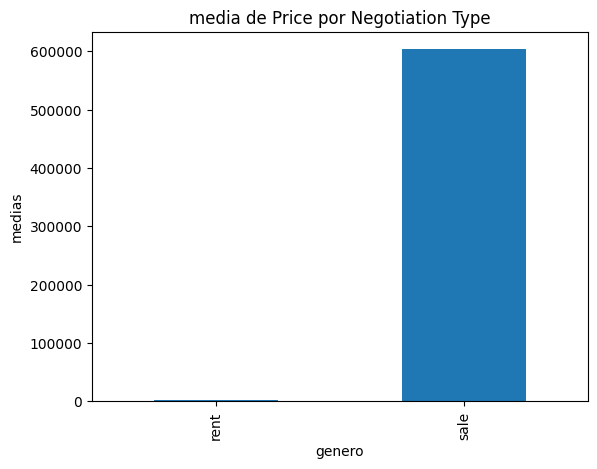

In [127]:
def media_por_caracteristica(df,c1 ,c2):
    intermediario = df.groupby(c1)
    medias = intermediario[c2].mean()

    medias.plot(kind= 'bar')
    plt.xlabel(f'genero')
    plt.ylabel(f'medias')
    plt.title(f'media de {c2} por {c1}')
    plt.show()

media_por_caracteristica(data, 'Negotiation Type', 'Price')

In [138]:
data_sale = data.loc[data['Negotiation Type'] == 'sale']
data_rent = data.loc[data['Negotiation Type'] == 'rent']

In [139]:
print(f'rent: {len(data_rent)} sale: {len(data_sale)}')

rent: 6588 sale: 5075


Como teremos um dataset exclusivo para cada uma, não faz sentido ter uma coluna de Negociation Type

In [130]:
data_sale.drop('Negotiation Type', axis = 1, inplace = True)
data_rent.drop('Negotiation Type', axis = 1, inplace = True)


<ipython-input-130-dd4db084512e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sale.drop('Negotiation Type', axis = 1, inplace = True)
<ipython-input-130-dd4db084512e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rent.drop('Negotiation Type', axis = 1, inplace = True)


# Análise Exploratória dos dados

## Análise de correlação entre os dados

In [131]:
data_rent.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000,6588.000000
mean,3143.264420,905.359441,91.039314,2.322253,2.117638,1.034001,1.480874,0.305404,0.176381,0.505616,0.000759,-22.025915,-43.482958
std,3548.218549,832.778043,64.703339,0.828267,1.013334,0.902099,0.899588,0.460613,0.381173,0.500006,0.027541,5.986702,11.712550
min,480.000000,1.000000,30.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-46.749039,-58.364352
25%,1400.000000,450.000000,53.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-23.598030,-46.690280
50%,2000.000000,636.500000,68.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,-23.556137,-46.647361
75%,3425.000000,1050.000000,104.000000,3.000000,2.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,-23.523394,-46.593497
max,50000.000000,9500.000000,880.000000,7.000000,8.000000,5.000000,9.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


In [132]:
data_sale.describe()

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Elevator,Furnished,Swimming Pool,New,Latitude,Longitude
count,5.075000e+03,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.00000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000,5075.000000
mean,6.028982e+05,678.913695,79.209852,2.320985,2.037044,0.922759,1.31803,0.408079,0.132611,0.543645,0.017143,-21.975376,-43.410174
std,6.607888e+05,629.957041,49.760830,0.720240,0.923037,0.765295,0.73226,0.491526,0.339187,0.498141,0.129816,6.022258,11.803724
min,4.200000e+04,1.000000,30.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-46.669247,-49.337815
25%,2.550000e+05,340.000000,50.000000,2.000000,2.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,-23.593508,-46.674196
50%,3.900000e+05,500.000000,63.000000,2.000000,2.000000,1.000000,1.00000,0.000000,0.000000,1.000000,0.000000,-23.550756,-46.633309
75%,6.885000e+05,800.000000,89.500000,3.000000,2.000000,1.000000,2.00000,1.000000,0.000000,1.000000,0.000000,-23.516297,-46.536318
max,8.500000e+06,8920.000000,540.000000,6.000000,7.000000,6.000000,7.00000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000


<ipython-input-140-ab9e8987f98b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = data_rent.corr()


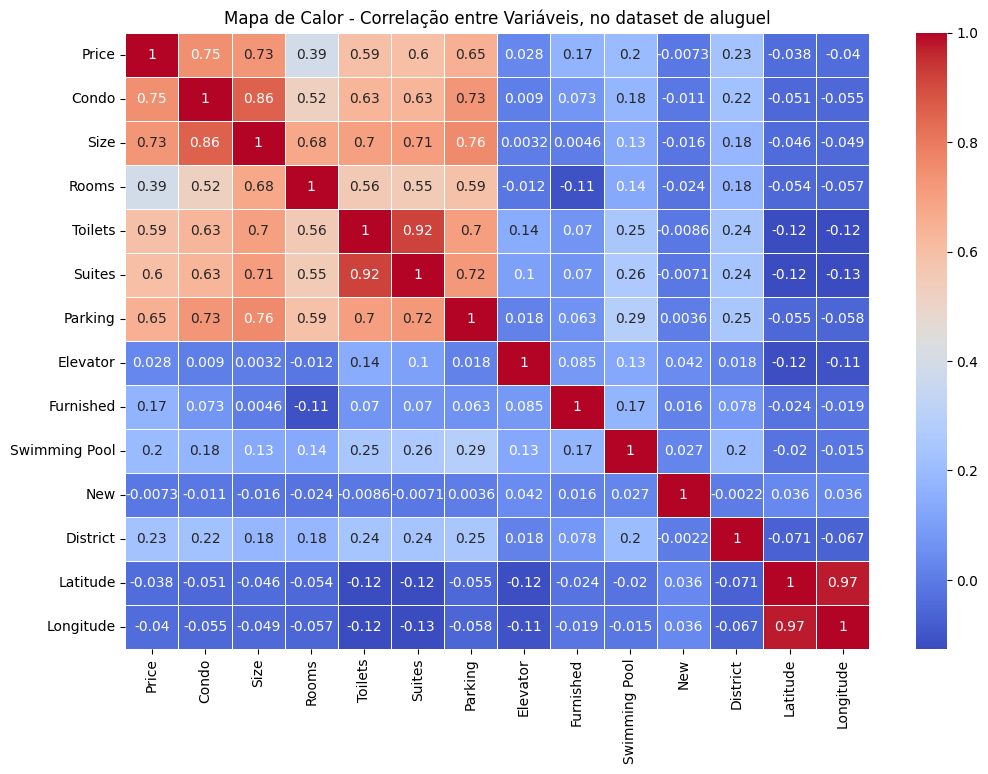

In [140]:
matriz_correlacao = data_rent.corr()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm',linewidths=.5)
plt.title('Mapa de Calor - Correlação entre Variáveis, no dataset de aluguel')
plt.show()

<ipython-input-141-e71fe8e00a9d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matriz_correlacao = data_sale.corr()


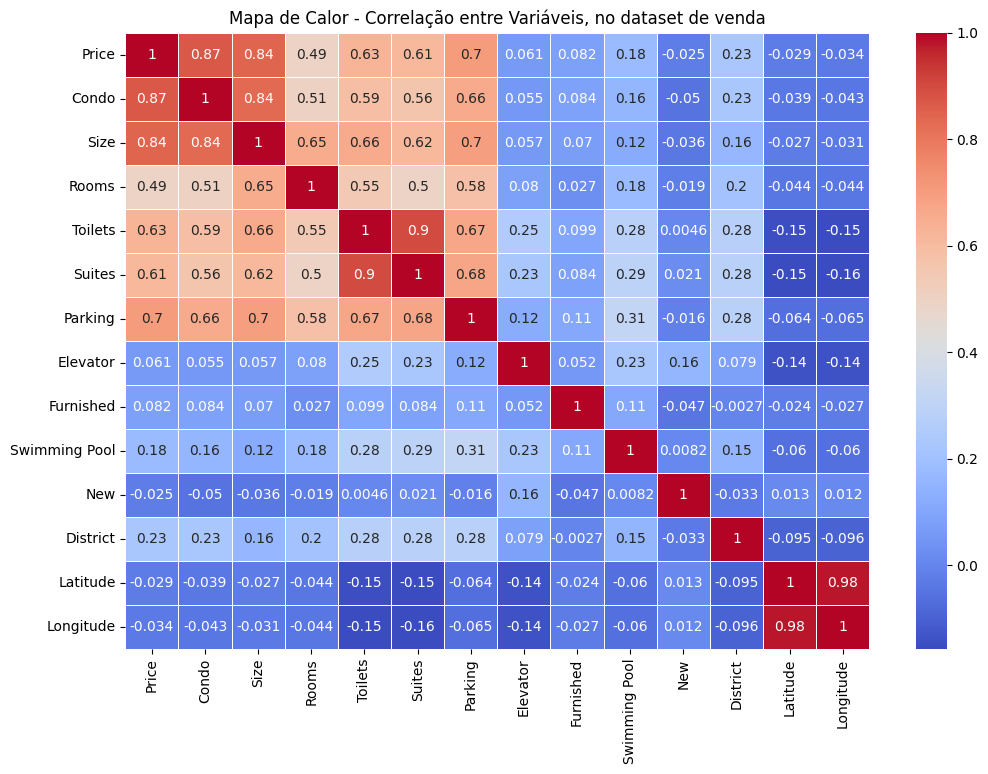

In [141]:
matriz_correlacao = data_sale.corr()
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm',linewidths=.5)
plt.title('Mapa de Calor - Correlação entre Variáveis, no dataset de venda')
plt.show()

É perceptível uma grande correlação entre os valores de preço do imóvel e condomínio, tamanho do imóvel, número de quartos, número de banheiros, número de suites e números de vagas de estacionamento. Também é possível perceber a correlação em menor valor, com district e swimming pool.

Percebemos a alta correlação entre latitude e longitude, porém nenhuma das duas possui correlação considerável com preço.

In [142]:
data_rent.drop('Longitude', axis = 1, inplace = True)
data_sale.drop('Longitude', axis = 1, inplace = True)

<ipython-input-142-7a02ddc34edf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rent.drop('Longitude', axis = 1, inplace = True)
<ipython-input-142-7a02ddc34edf>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sale.drop('Longitude', axis = 1, inplace = True)


## A seguir faremos algumas médias de preço baseadas nas características

In [143]:
def media_por_caracteristica(df,c1 ,c2):
    intermediario = df.groupby(c1)
    medias = intermediario[c2].mean()

    medias.plot(kind= 'bar')
    plt.xlabel(f'{c1}')
    plt.ylabel(f'medias')
    plt.title(f'media de {c2} por {c1}')
    plt.show()

def contagem_por_caracteristica(df, c1,c2):
    contagens= df.groupby(c1).size()
    contagens.plot(kind = 'bar')
    plt.xlabel(f'{c1}')
    plt.ylabel(f'contagens')
    plt.title(f'contagens de {c2} por {c1}')
    plt.show()

### Primeiramente para data_rent

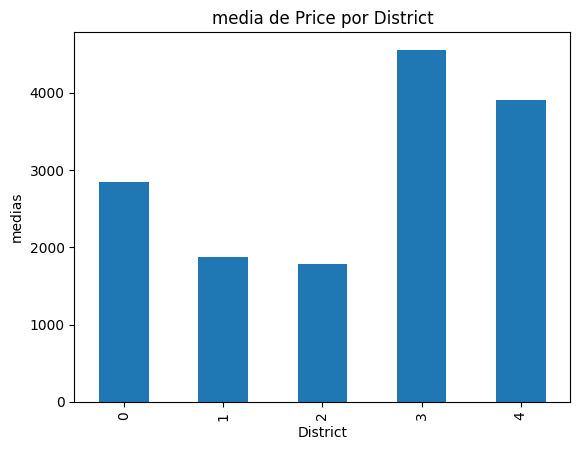

In [144]:
media_por_caracteristica(data_rent, 'District','Price')

É possível perceber que a região com a maior média de preço é a zona oeste, enquanto a zona norte possui a menor média de preço. Isso provavelmente é um reflexo da realidade socioecônomica de tais regiões.

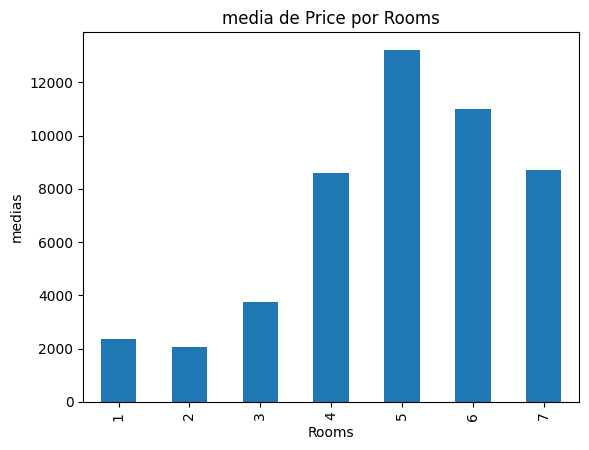

In [145]:
media_por_caracteristica(data_rent, 'Rooms' , 'Price')

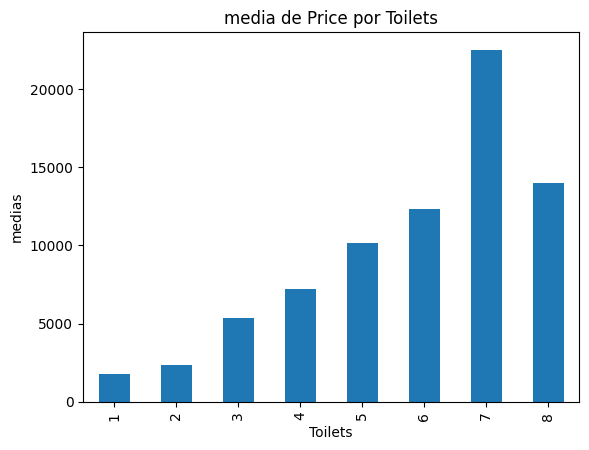

In [146]:
media_por_caracteristica(data_rent, 'Toilets' , 'Price')

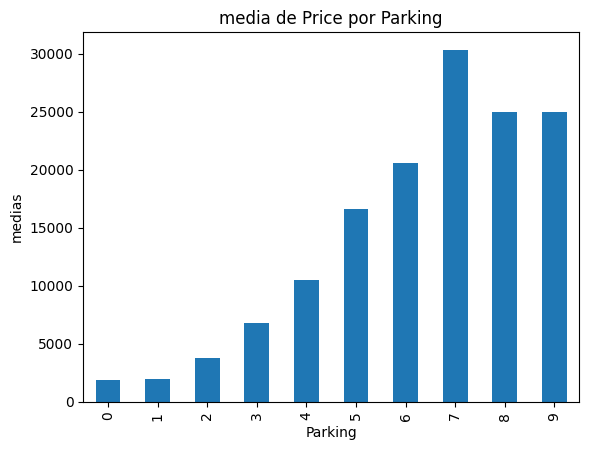

In [147]:
media_por_caracteristica(data_rent, 'Parking' , 'Price')

É interessante ver um comportamento em particular com os valores acima, existe uma tendência de crescimento até determinado ponto, após isso é ocorre uma queda considerável na média de preço, vamos avaliar esse comportamento nas próximas células

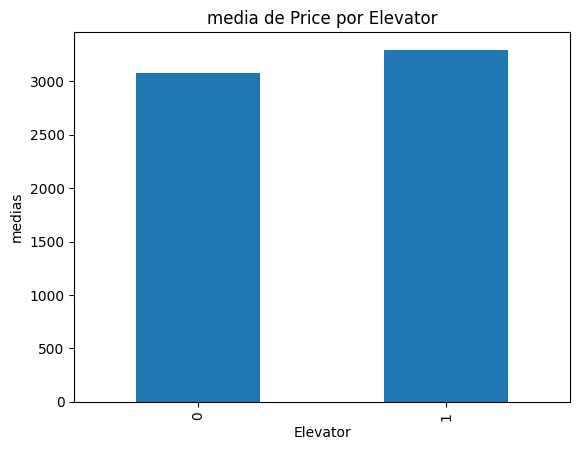

In [148]:
media_por_caracteristica(data_rent, 'Elevator' , 'Price')

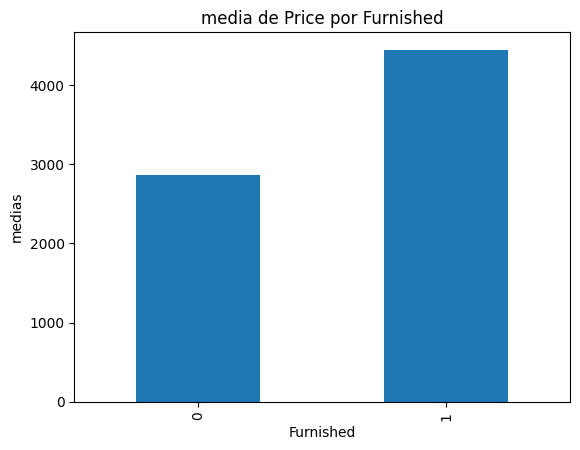

In [149]:
media_por_caracteristica(data_rent, 'Furnished' , 'Price')

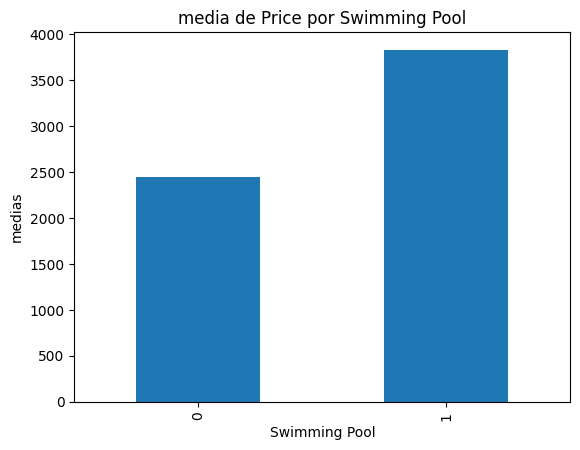

In [150]:
media_por_caracteristica(data_rent, 'Swimming Pool' , 'Price')

Possuir piscina e estar mobilhado parecem exercer influência no preço. Enquanto a presença de elevador parece não influenciar tanto

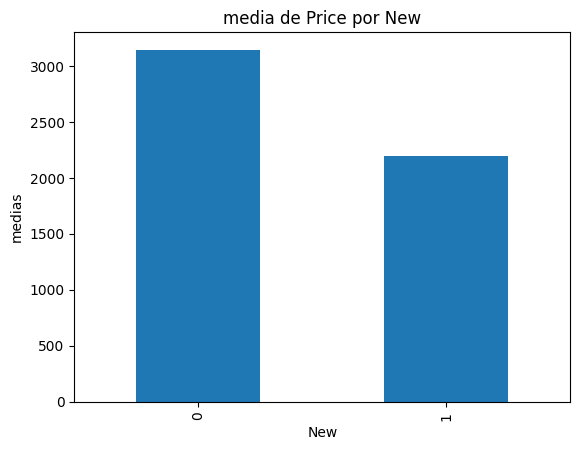

In [151]:
media_por_caracteristica(data_rent, 'New' , 'Price')

Aqui percebemos um comportamento um pouco contra intuitivo, em que os imóveis novos possuem média de valor menor que os imóveis novos

In [34]:
data_aux = data_rent.loc[data['New'] == 1]
data_aux = data_aux.groupby('District').size()
data_aux

District
1    1
2    3
4    1
dtype: int64

Aqui percebemos que o pode explicar o fato de imóveis novos terem valores menores. A grande maioria imóveis se encontra nas zonas com os menores valores médios(leste e norte).

### Agora vamos olhar o comportamento de data_sale

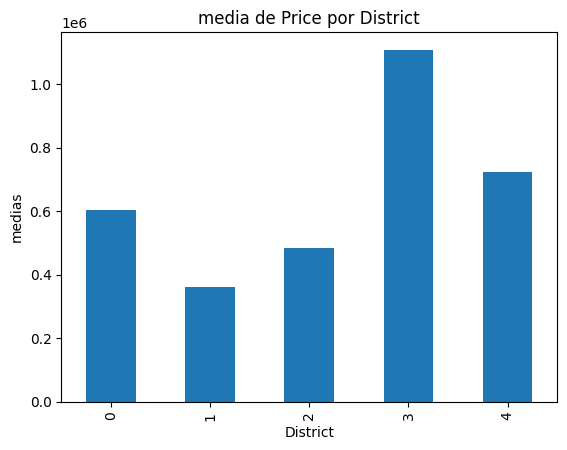

In [152]:
media_por_caracteristica(data_sale, 'District', 'Price' )

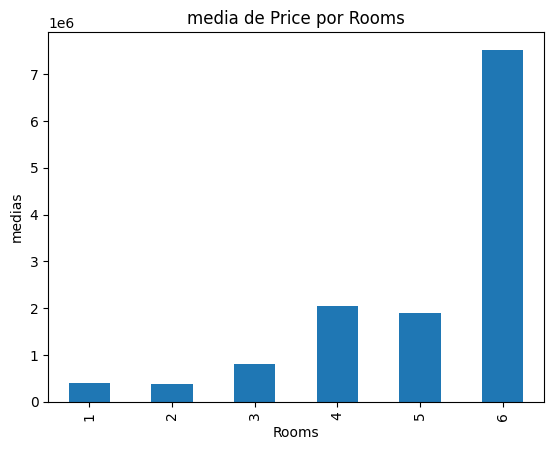

In [153]:
media_por_caracteristica(data_sale, 'Rooms', 'Price')

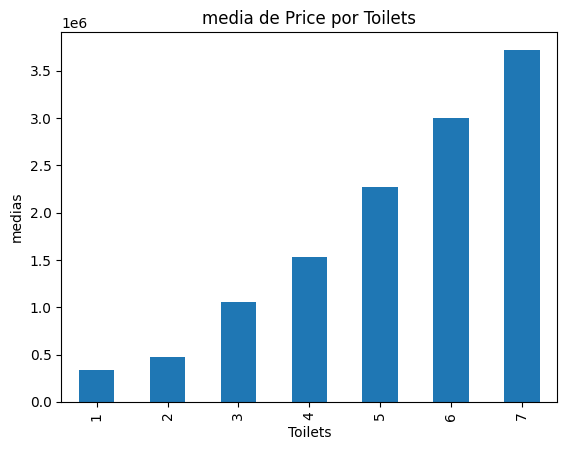

In [154]:
media_por_caracteristica(data_sale, 'Toilets' , 'Price')

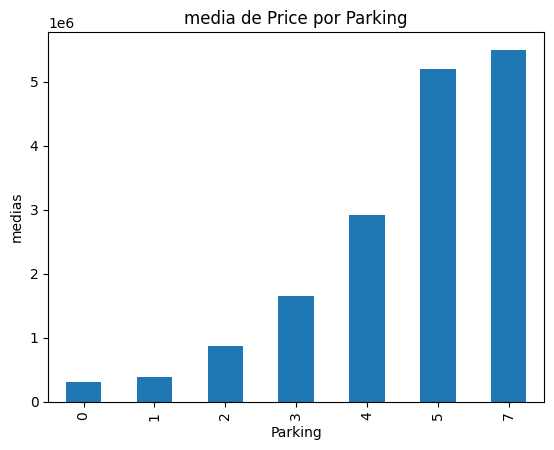

In [155]:
media_por_caracteristica(data_sale, 'Parking' , 'Price')

Agora as médias possuem valor crescente, diferente de rent em que ocorriam quedas abruptas após determinado ponto

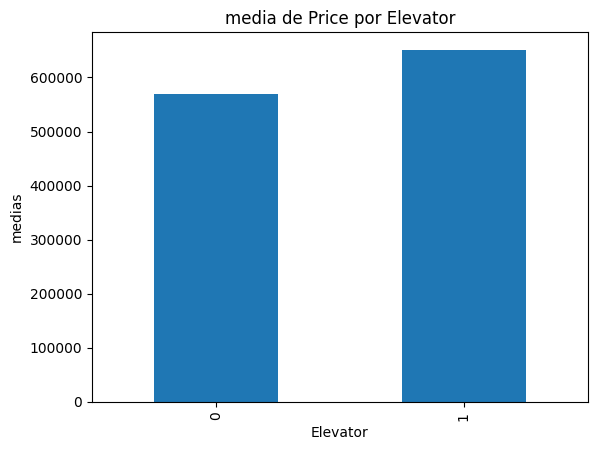

In [156]:
media_por_caracteristica(data_sale, 'Elevator' , 'Price')

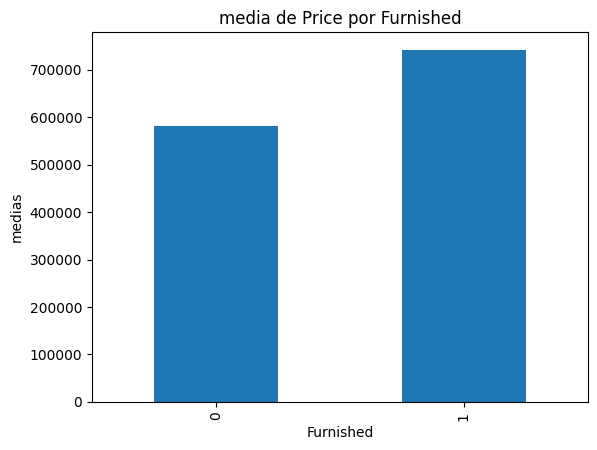

In [157]:
media_por_caracteristica(data_sale, 'Furnished' , 'Price')

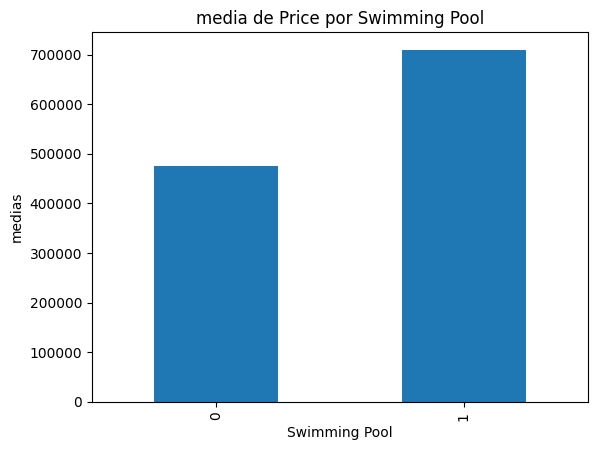

In [158]:
media_por_caracteristica(data_sale, 'Swimming Pool' , 'Price')

Novamente, temos o comportamento visto em data_rent, ter piscina ou ser mobilhado possuem influência considerável nas médias de preço, enquanto a presença de elevador continua aparentando não fazer tanta diferença.

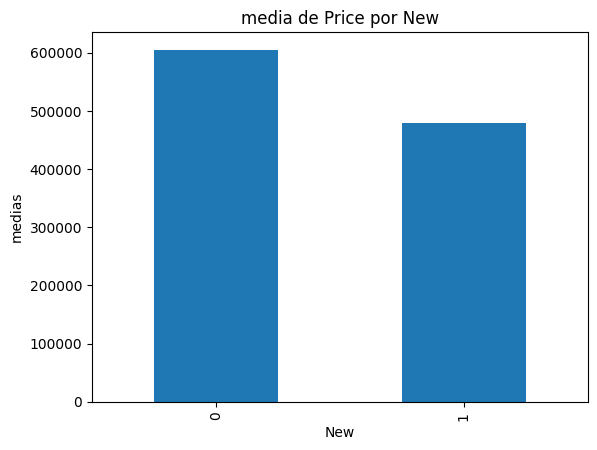

In [159]:
media_por_caracteristica(data_sale, 'New', 'Price')

In [42]:
data_aux = data_sale.loc[data['New'] == 1]
data_aux = data_aux.groupby('District').size()
data_aux

District
0    10
1    44
2    12
3    16
4     5
dtype: int64

Novamente vemos uma distribuição similar ao que foi visto no dataframe de aluguéis: Os imóveis novos se concentram em zonas que o valor médio do preço é menor, isso contribui para a diminuição do preço

## Análise da distribuição dos imóveis baseadas em determinadas categorias

In [160]:
def distribucao_por_caracteristica_barra(df, c1):
    intermediario = df.groupby(c1).size()

    intermediario.plot(kind = 'bar')
    plt.xlabel(f'{c1}')
    plt.ylabel('distribuição')
    plt.title(f'distribuição de imóveis por {c1}')
    plt.show()

def distribuicao_por_caracteristica_setor(df, c1):
    intermediario = df.groupby(c1).size()

    plt.pie(intermediario, labels = intermediario.index,autopct='%1.1f%%', startangle=140)
    plt.title(f'distribuição por {c1}')
    plt.show()

### Vamos obsevar essa distribuição para o dataframe de aluguéis, primeiramente

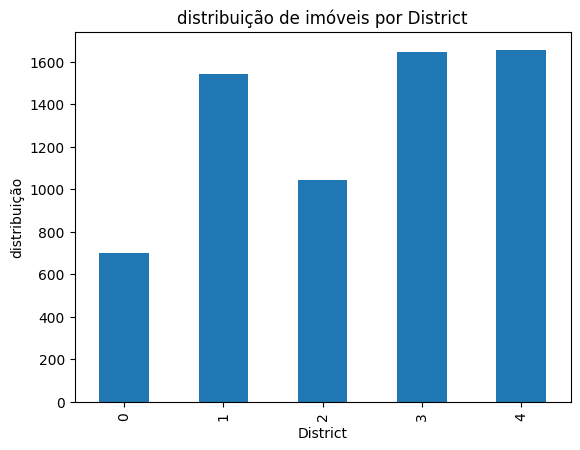

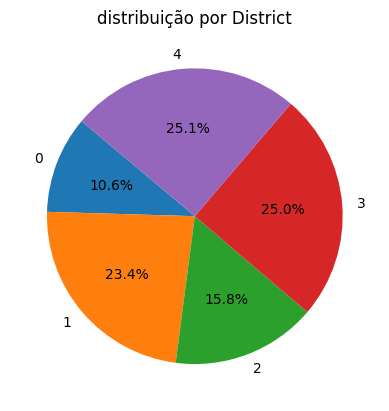

In [161]:
distribucao_por_caracteristica_barra(data_rent, 'District')
distribuicao_por_caracteristica_setor(data_rent, 'District')

Os distritos 0 e 2 possuem a menor quantidade de imóveis, enquanto 1, 3 e 4 possuem de forma "equilibrada" o restante.

#### Vamos observar esse comportamento para as características binárias

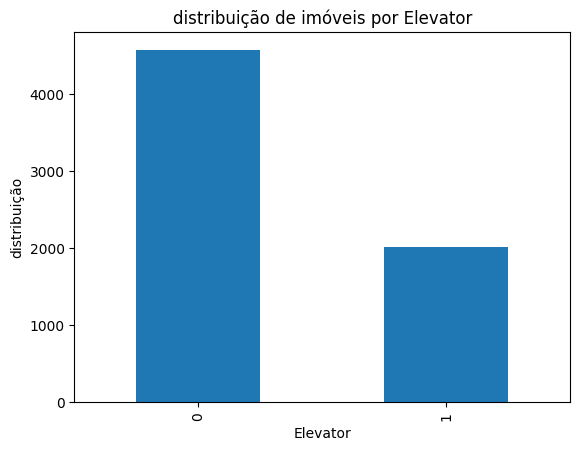

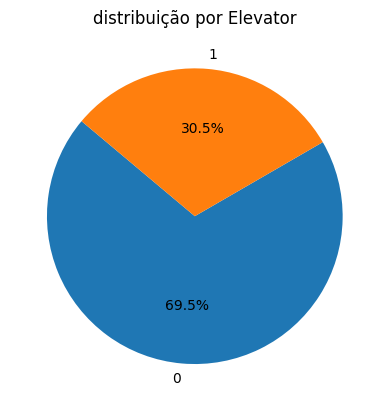

In [162]:
distribucao_por_caracteristica_barra(data_rent,'Elevator')
distribuicao_por_caracteristica_setor(data_rent,'Elevator')

A maioria dos imóveis para alugar não possuem elevador

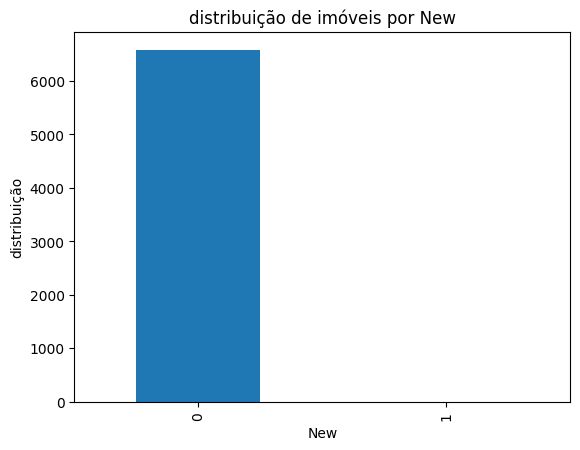

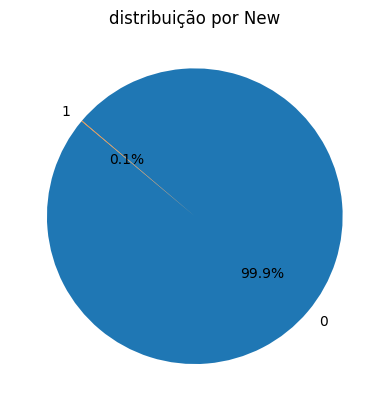

In [163]:
distribucao_por_caracteristica_barra(data_rent,'New')
distribuicao_por_caracteristica_setor(data_rent,'New')

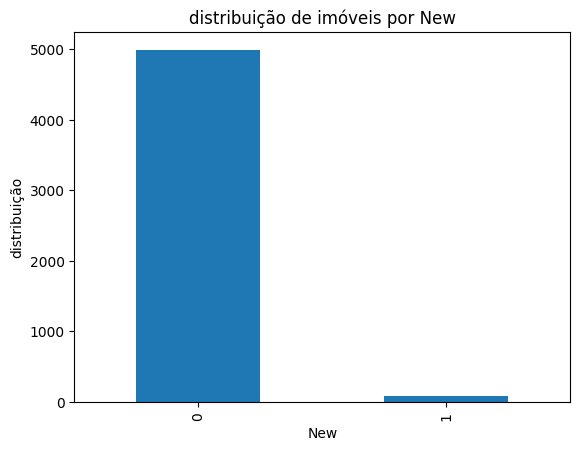

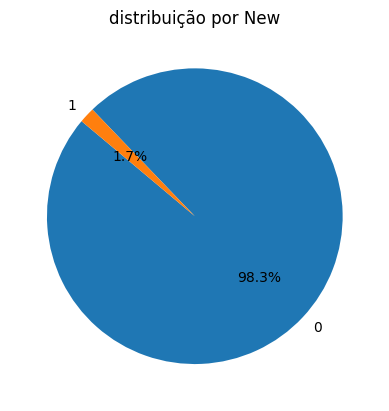

In [164]:
distribucao_por_caracteristica_barra(data_sale, 'New')
distribuicao_por_caracteristica_setor(data_sale, 'New')

In [165]:
intermediario = data_rent.groupby('New').size()
intermediario

New
0    6583
1       5
dtype: int64

In [166]:
intermediario = data_sale.groupby('New').size()
intermediario

New
0    4988
1      87
dtype: int64

Existe uma disparidade absurda entre a quantidade de imóveis velhos e novos para alugar,isso também se repete nos imóveis para venda. É importante lembrar que New era uma das variáveis que possuia uma das menores correlações com Price, de -0.0073 em data_rent e -0.024 em data_sale, por conta disso achamos melhor retirar a coluna New.  

In [167]:
data_rent.drop('New', axis=1, inplace= True)
data_sale.drop('New', axis=1, inplace= True)

<ipython-input-167-33315078ed39>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_rent.drop('New', axis=1, inplace= True)
<ipython-input-167-33315078ed39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sale.drop('New', axis=1, inplace= True)


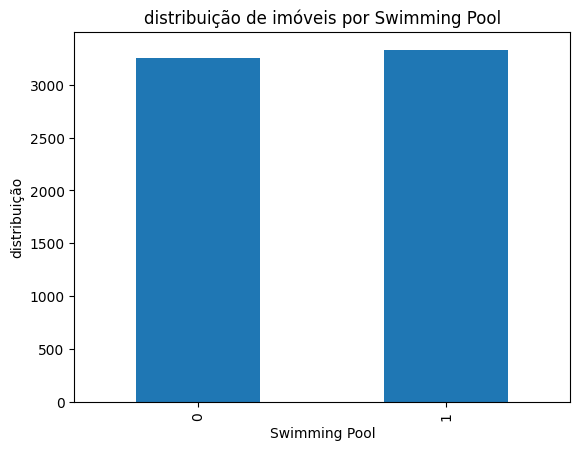

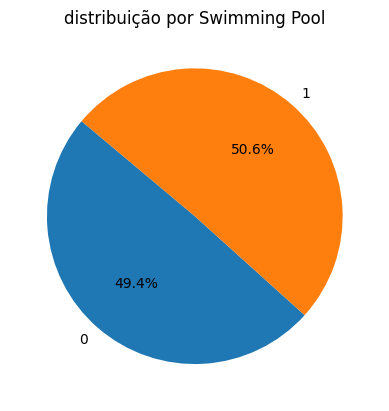

In [168]:
distribucao_por_caracteristica_barra(data_rent, 'Swimming Pool')
distribuicao_por_caracteristica_setor(data_rent,'Swimming Pool')

Percebemos um grande equilibrio entre as duas categorias

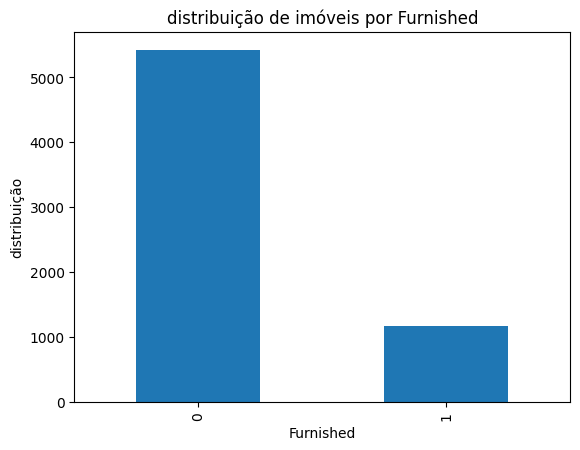

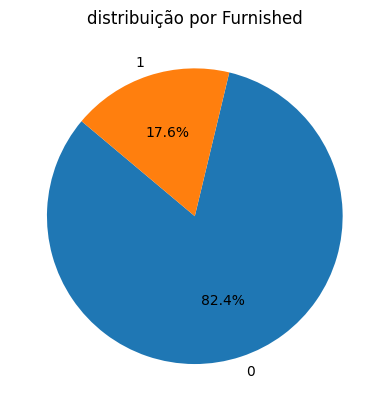

In [169]:
distribucao_por_caracteristica_barra(data_rent, 'Furnished')
distribuicao_por_caracteristica_setor(data_rent, 'Furnished')

A grande maioria dos imóveis não são alugados mobilhados

#### Agora para quantidade de quartos, banheiros, suites e vagas de estacionamento

##### Quartos

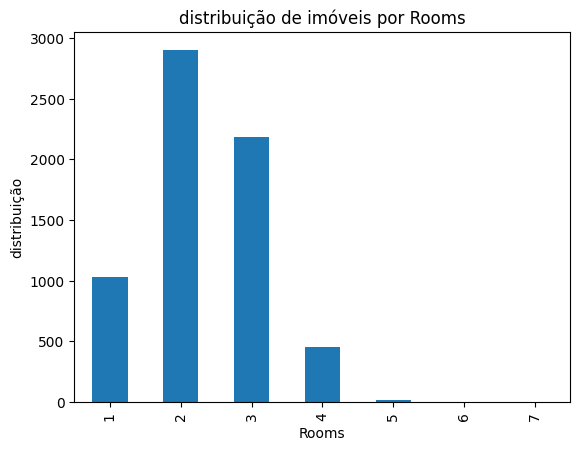

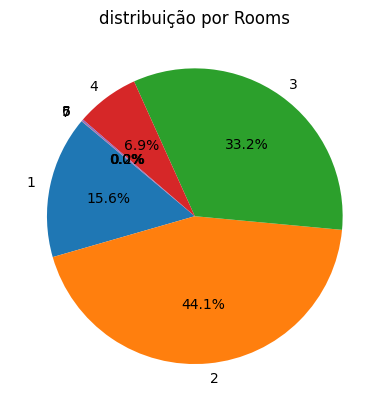

In [54]:
distribucao_por_caracteristica_barra(data_rent, 'Rooms')
distribuicao_por_caracteristica_setor(data_rent, 'Rooms')

In [170]:
intermediario = data_rent.groupby('Rooms').size()
intermediario

Rooms
1    1026
2    2903
3    2188
4     456
5      12
6       2
7       1
dtype: int64

O que vemos aqui é que temos pouquíssimas ocorrências a partir de 5 quartos. Com isso, nós enxergamos duas possibilidades:
- i) Retiramos esses dados do dataframe
- ii) Agrupamos todos na categoria 4.

Optamos por retirá-los do dataframe, esse comportamento também é visto em data_sale, então repetimos o processo

In [56]:
intermediario = data_sale.groupby('Rooms').size()
intermediario

Rooms
1     498
2    2706
3    1623
4     241
5       6
6       1
dtype: int64

In [171]:
data_sale = data_sale.loc[data_sale['Rooms'] < 5]
data_rent = data_rent.loc[data_rent['Rooms'] < 5]

In [172]:
intemediario1 = data_sale.groupby('Rooms').size()
intemediario2 = data_rent.groupby('Rooms').size()

print(intemediario1)

print(intemediario2)

Rooms
1     498
2    2706
3    1623
4     241
dtype: int64
Rooms
1    1026
2    2903
3    2188
4     456
dtype: int64


##### Banheiros, Vagas e Suites

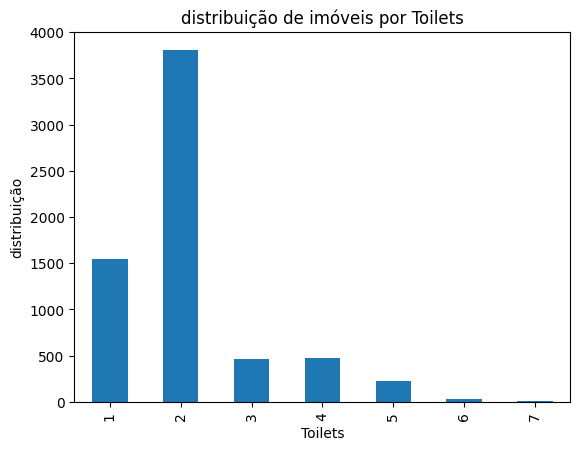

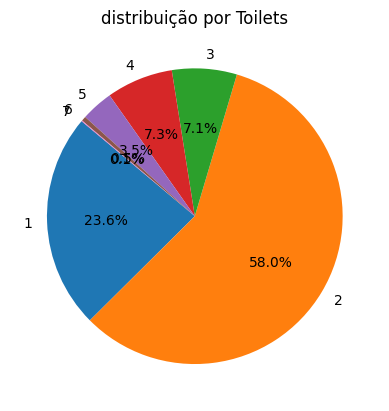

In [173]:
distribucao_por_caracteristica_barra(data_rent,'Toilets')
distribuicao_por_caracteristica_setor(data_rent, 'Toilets')

In [174]:
intermediario = data_rent.groupby('Toilets').size()
intermediario

Toilets
1    1548
2    3810
3     466
4     479
5     231
6      33
7       6
dtype: int64

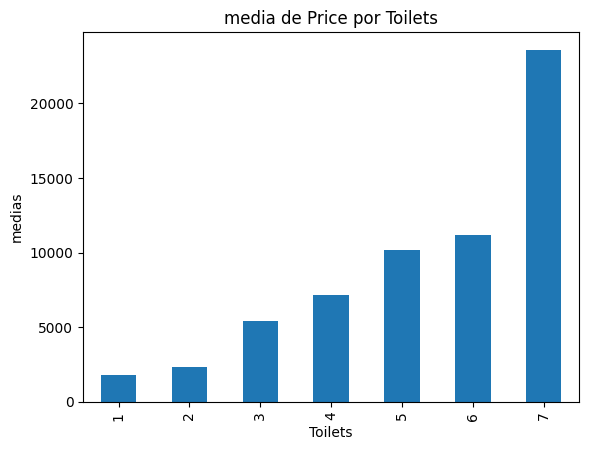

In [175]:
media_por_caracteristica(data_rent, 'Toilets', 'Price')

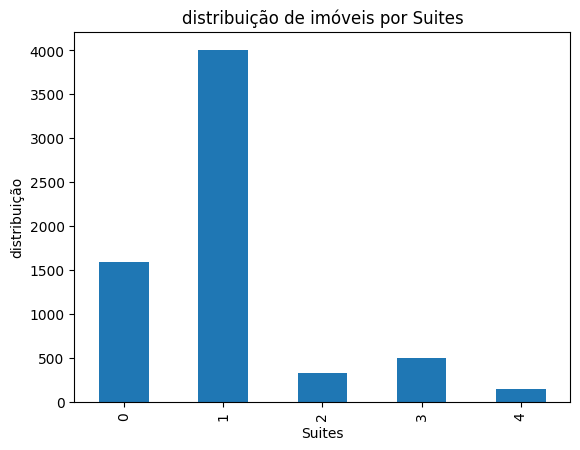

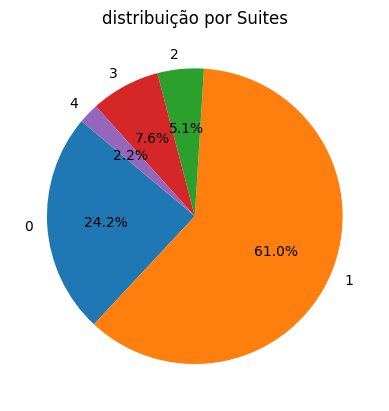

In [62]:
distribucao_por_caracteristica_barra(data_rent,'Suites')
distribuicao_por_caracteristica_setor(data_rent, 'Suites')

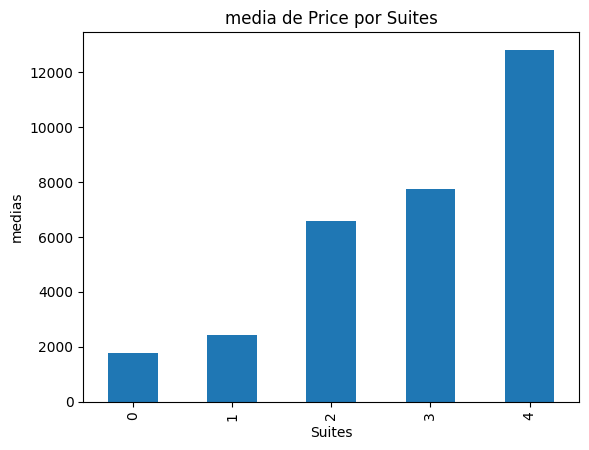

In [176]:
media_por_caracteristica(data_rent, 'Suites', 'Price')


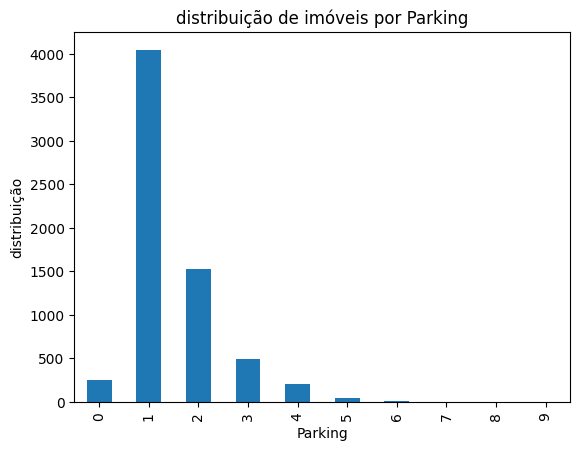

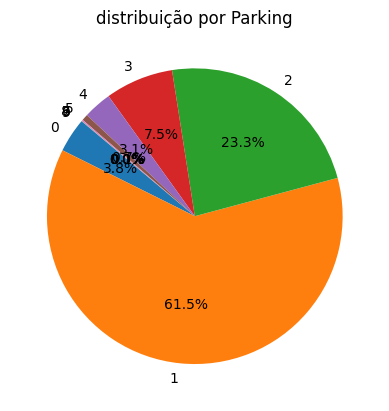

In [60]:
distribucao_por_caracteristica_barra(data_rent,'Parking')
distribuicao_por_caracteristica_setor(data_rent, 'Parking')

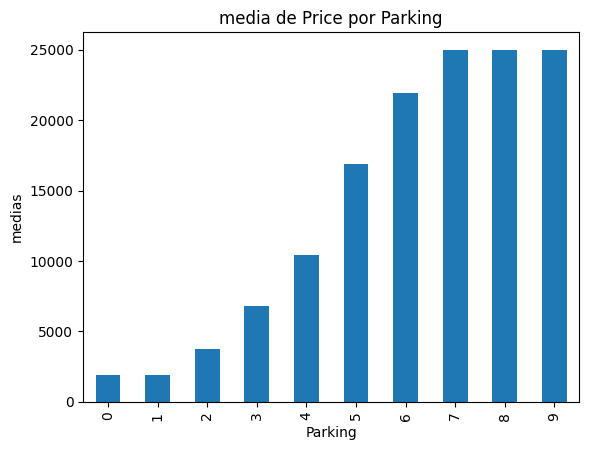

In [177]:
media_por_caracteristica(data_rent, 'Parking', 'Price')

Nos casos de parking e toilets também temos categorias com poucos valores, entretanto diferentemente de quartos, a crescente continua, porem agora, como já retiramos aquelas linhas que possuíam imóveis com mais de 5 quartos, que quebravam a tendencia de crescimento do preço, os valores para as demais categorias podem ficar pois não podem gerar falsas conclusões sobre os preços.

### Agora para o dataframe de vendas

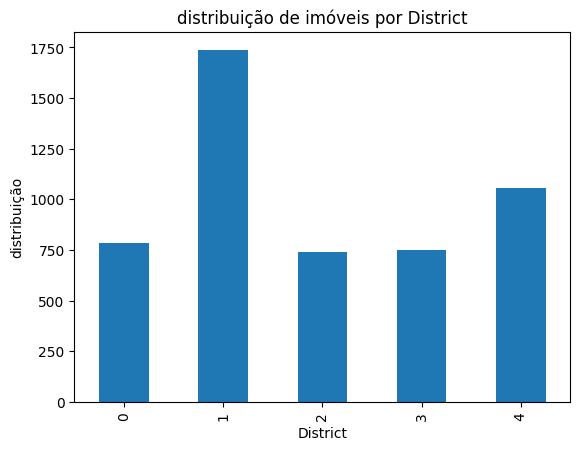

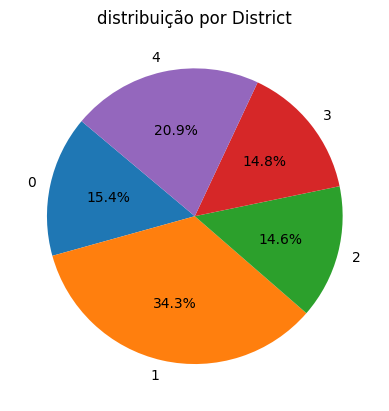

In [178]:
distribucao_por_caracteristica_barra(data_sale, 'District')
distribuicao_por_caracteristica_setor(data_sale, 'District')

Diferentemente do dataframe de aluguel, aqui um dos distritos possui uma vantagem considerável na "liderança" do número de imóveis, enquanto os demais possuem certo equilibrio.

#### Banheiros, suites e vagas de estacionamento

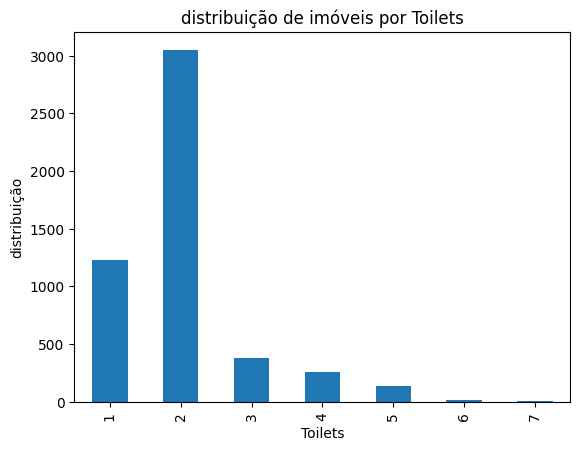

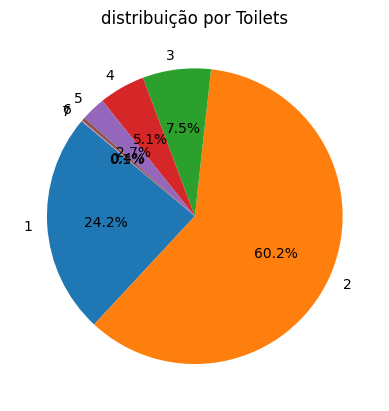

In [179]:
distribucao_por_caracteristica_barra(data_sale,'Toilets')
distribuicao_por_caracteristica_setor(data_sale, 'Toilets')

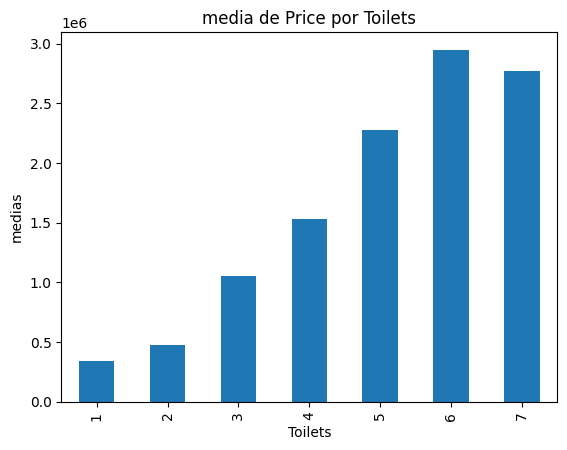

In [180]:
media_por_caracteristica(data_sale, 'Toilets', 'Price')

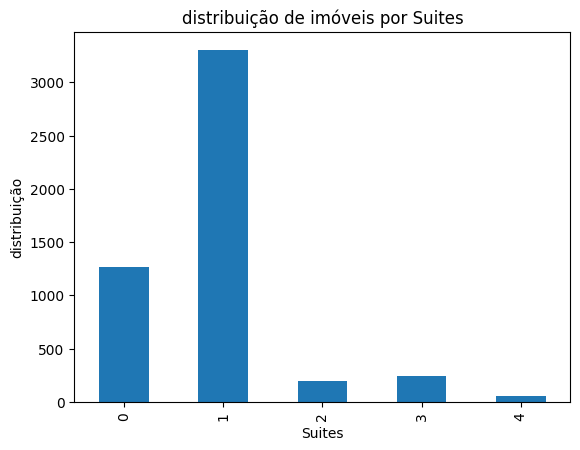

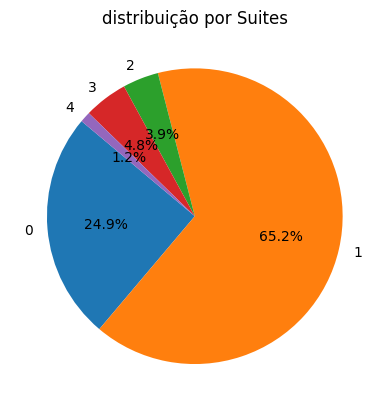

In [181]:
distribucao_por_caracteristica_barra(data_sale,'Suites')
distribuicao_por_caracteristica_setor(data_sale, 'Suites')

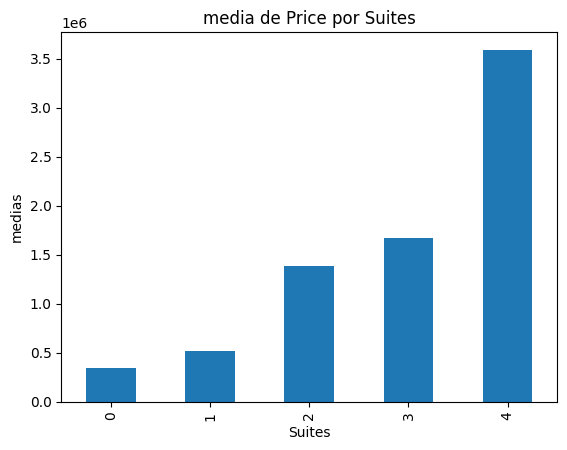

In [69]:
media_por_caracteristica(data_sale, 'Suites', 'Price')

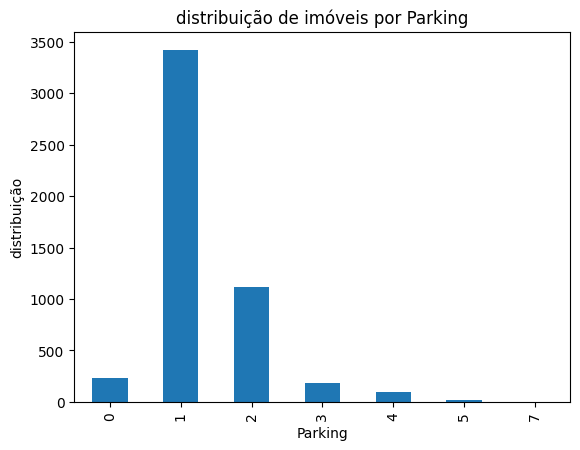

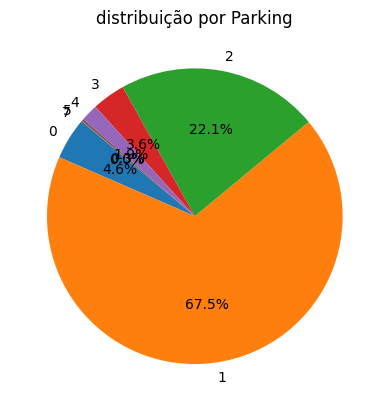

In [182]:
distribucao_por_caracteristica_barra(data_sale,'Parking')
distribuicao_por_caracteristica_setor(data_sale, 'Parking')

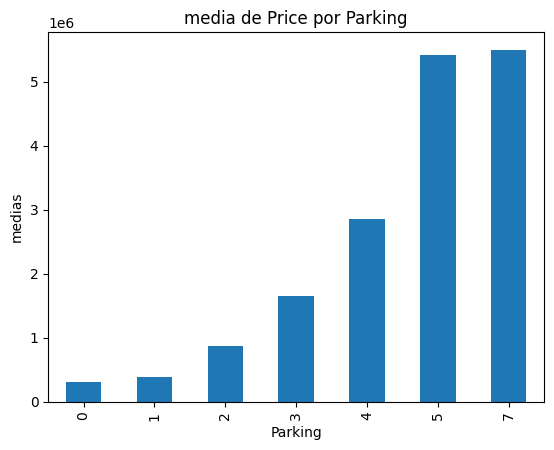

In [67]:
media_por_caracteristica(data_sale, 'Parking', 'Price')

Assim, como em data_rent percebemos que ao retirar os imóveis com mais de 5 quartos, os imóveis com valores maiores para as colunas mostradas , nãio afetam uma possível predição, pois aquele comportamento anômalo registrado anteriormente não ocorre mais, como mostrado pelos gráficos de médias de preço.

#### Vamos observar esse comportamento para as características binárias

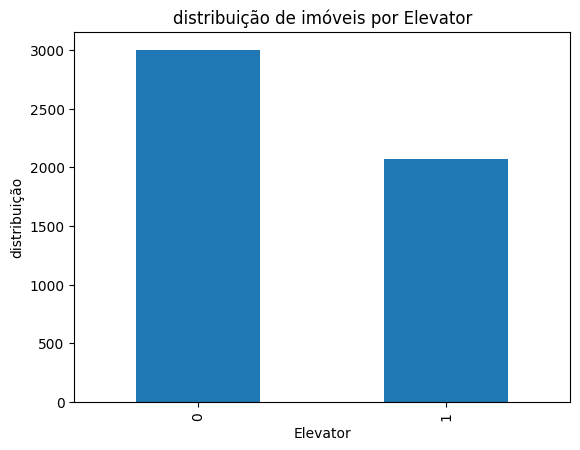

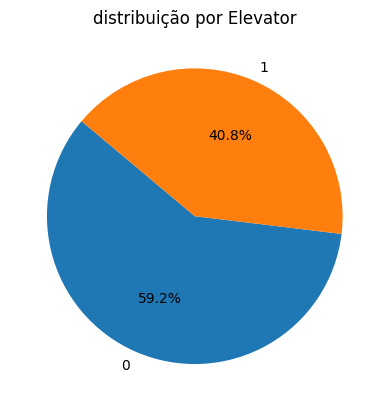

In [183]:
distribucao_por_caracteristica_barra(data_sale,'Elevator')
distribuicao_por_caracteristica_setor(data_sale,'Elevator')

Aqui ainda se tem uma maioria de imóveis sem elevador, assim como os para aluguel, mudando apenas a diferença entre os dois, que é menor

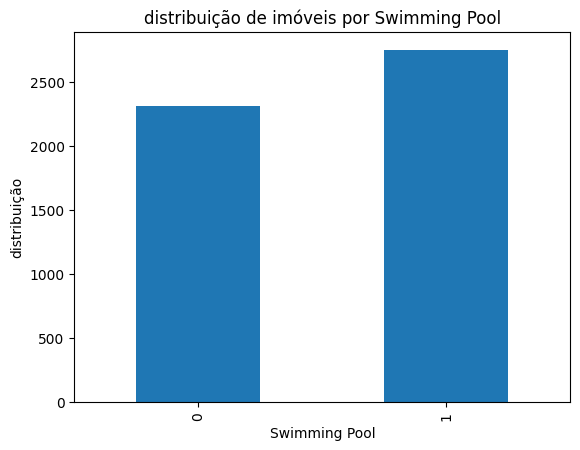

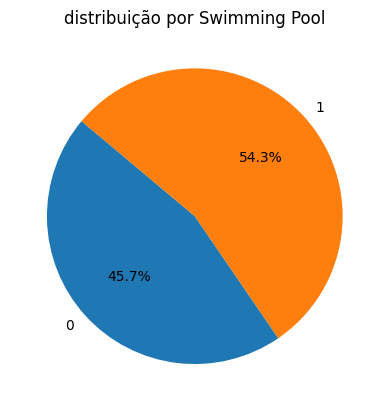

In [184]:
distribucao_por_caracteristica_barra(data_sale, 'Swimming Pool')
distribuicao_por_caracteristica_setor(data_sale,'Swimming Pool')

Também se mantem o equilíbrio entre os dois, mas nesse caso a diferença é um pouco maior entre os que possuem e não piscina.

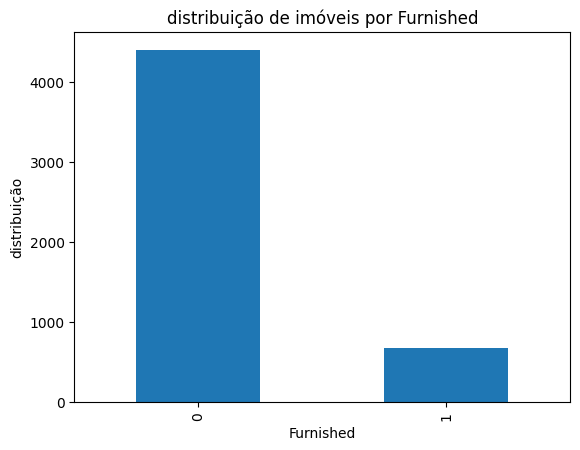

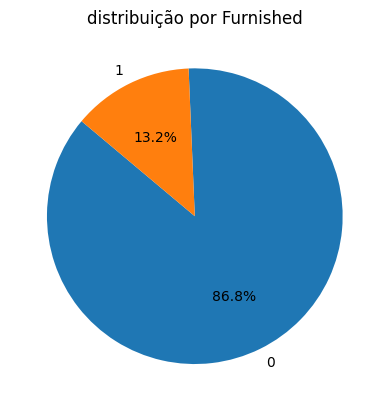

In [185]:
distribucao_por_caracteristica_barra(data_sale, 'Furnished')
distribuicao_por_caracteristica_setor(data_sale, 'Furnished')

A grande maioria dos imóveis não são vendidos mobilhados

## Outros gráficos

Quantidade de outliers: 613


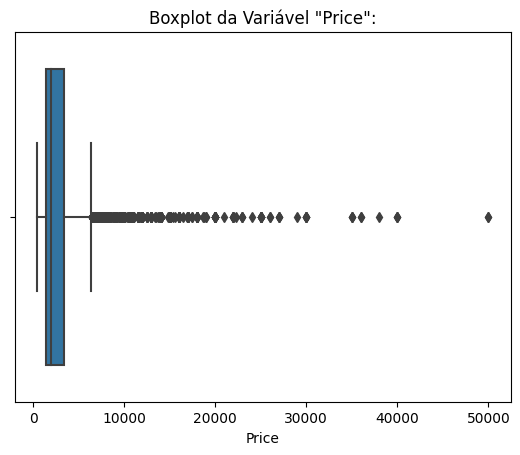

In [186]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='Price', data=data_rent)

q1 = data_rent['Price'].quantile(0.25)
q3 = data_rent['Price'].quantile(0.75)
iqr = q3 - q1

limite_superior = q3 + 1.5 * iqr
limite_inferior = q1 - 1.5 * iqr

outliers_index = (data_rent['Price'] > limite_superior) | (data_rent['Price'] < limite_inferior)
#data_rent = data_rent[~outliers_index]
1
print(f'Quantidade de outliers: {sum(outliers_index)}')

plt.title('Boxplot da Variável "Price":')
plt.show()

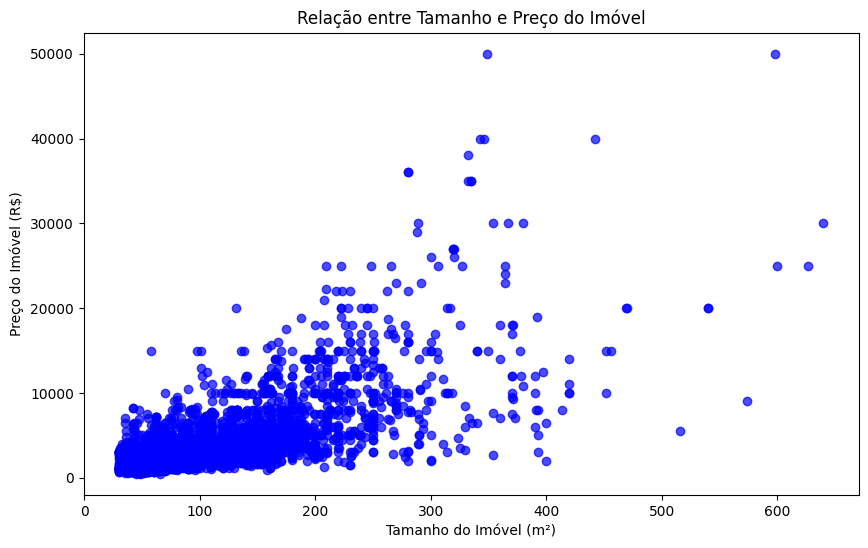

In [187]:
plt.figure(figsize=(10, 6))
plt.scatter(data_rent['Size'], data_rent['Price'], color='blue', alpha=0.7)

plt.title('Relação entre Tamanho e Preço do Imóvel')
plt.xlabel('Tamanho do Imóvel (m²)')
plt.ylabel('Preço do Imóvel (R$)')

plt.show()

# Antes de criar os modelos...

Vamos recapitular o que foi feito:
- Importamos o dataset sao-paulo-properties-april-2019.csv
- Agrupamos os distritos(caindo de 96 para 5) e fizemos o encode para poder utilizar esse atributo em futuros modelos de predição
- Também fizemos encode do atributo ('Negotiation Type'), dado a sua importância na predição que queremos fazer
- Retiramos a coluna property type, tendo em vista que todas as linhas possuiam valor igual ('Apartment')
- Retiramos as linhas que tinham condo = 0, pelo fato de o autor informar na explicação do dataset que isso significava que ele não tinha o valor exato, então simbolizava um valor nulo.
- Retiramos Elevator, dado a sua baixa correlação com Price
- Retiramos Latitude e Longitude. Todos os imóveis estão na cidade de São Paulo, se diferenciando somente nos bairros, por conta disso não temos uma grande variação nos valores, levando isso em conta achamos que seria melhor para diminuir a complexidade do problema.
- Retiramos os imóveis que possuíam mais de 5 quartos, pela pouquíssima quantidade de linhas e um comportamento anormal então era provável que os modelos tivessem certa dificuldade em prever seu preço, como visto em sala de aula.
- Utilizaremos tanto os apartamentos para alugar quanto para vender nos modelos, pois notamos melhor desempenho desta forma.

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

arquivo = '/content/drive/My Drive/Cienciadedados/sao-paulo-properties-april-2019.csv'
data = pd.read_csv(arquivo)

data['District'] = data['District'].apply(lambda x: x.split('/')[0])
data['District'] = data['District'].replace(dicionario_centro)
data['District'] = data['District'].replace(dicionario_zonaleste)
data['District'] = data['District'].replace(dicionario_zonanorte)
data['District'] = data['District'].replace(dicionario_zonaoeste)
data['District'] = data['District'].replace(dicionario_zonasul)

label_encoder = LabelEncoder()
data['District'] = label_encoder.fit_transform(data['District'])
#depois tirar a de baixo
data['Negotiation Type'] = label_encoder.fit_transform(data['Negotiation Type'])

data.drop('Property Type', axis = 1, inplace = True)
data.drop('Latitude', axis = 1, inplace = True)
data.drop('Longitude', axis = 1, inplace = True)
data.drop('New', axis  = 1, inplace = True)
data.drop('Elevator', axis= 1, inplace =True)

data = data.loc[data['Condo'] > 0]

data.loc[data['Rooms'] >5]

,Price,Condo,Size,Rooms,Toilets,Suites,Parking,Furnished,Swimming Pool,District,Negotiation Type
3864,8000,4200,510,6,5,4,3,0,1,3,0
8949,7521000,2500,377,6,7,6,4,0,1,3,1
9941,14000,5800,400,6,8,2,2,1,0,3,0
10698,8700,5040,852,7,6,5,6,0,1,3,0


Aqui fizemos um laço para remover os outliers até que não apareçam mais esses pontos no boxplot. Notamos que isso melhorava o desempenho dos modelos

Quantidade de outliers: 859


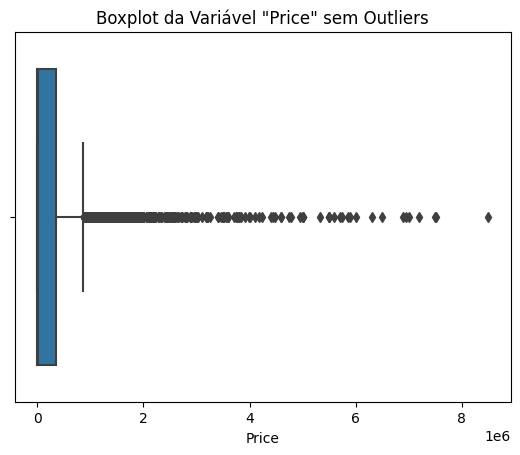

Quantidade de outliers: 366


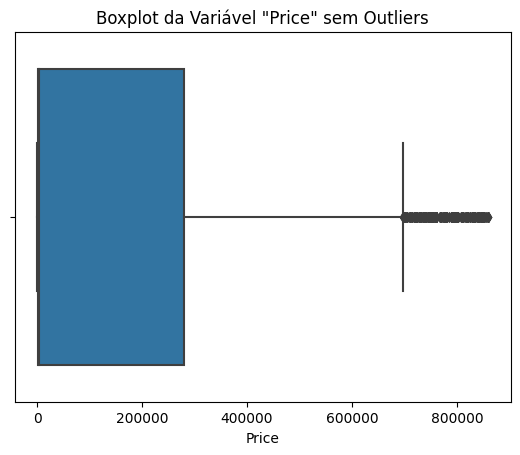

Quantidade de outliers: 265


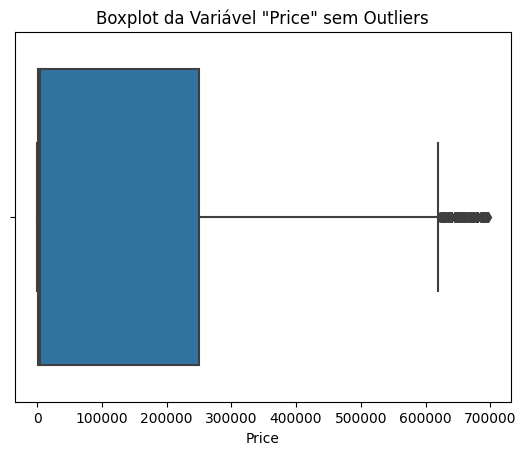

Quantidade de outliers: 82


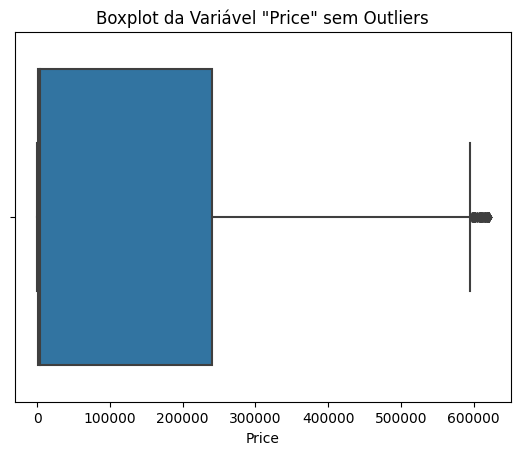

Quantidade de outliers: 51


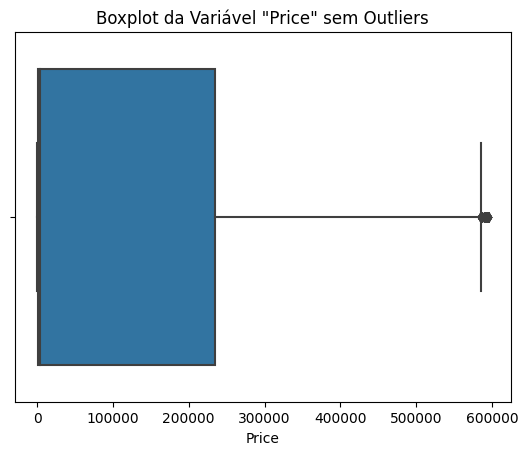

Quantidade de outliers: 33


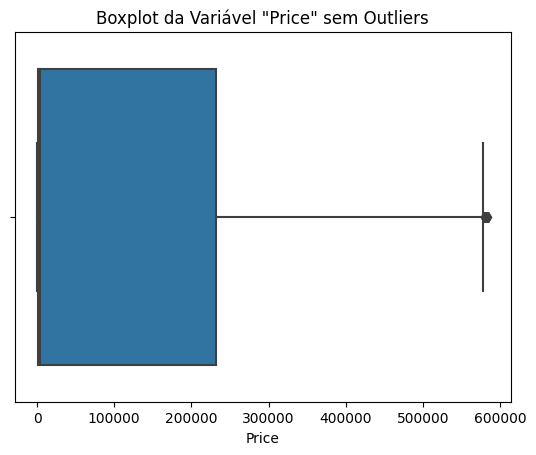

Quantidade de outliers: 7


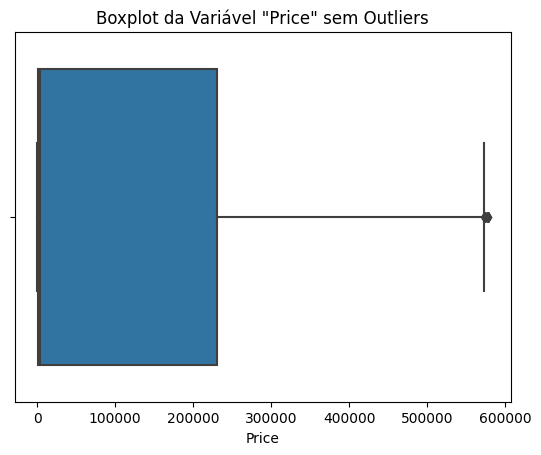

Quantidade de outliers: 0


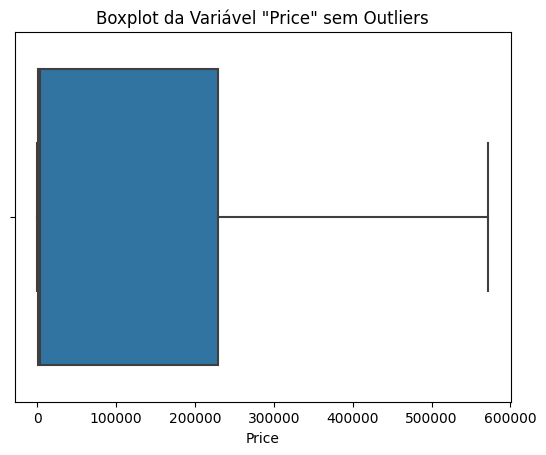

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
out = 1
while(out!= 0):
  sns.boxplot(x='Price', data=data)

  q1 = data['Price'].quantile(0.25)
  q3 = data['Price'].quantile(0.75)
  iqr = q3 - q1

  limite_superior = q3 + 1.5 * iqr
  limite_inferior = q1 - 1.5 * iqr

  outliers_index = (data['Price'] > limite_superior) | (data['Price'] < limite_inferior)
  data = data[~outliers_index]
  out = sum(outliers_index)
  print(f'Quantidade de outliers: {sum(outliers_index)}')

  plt.title('Boxplot da Variável "Price" sem Outliers')
  plt.show()

E aqui nós tratamos os dados que vamos utilizar, normalizando por meio do StandardScaler os dados numéricos, e adequando os dados categóricos por meio do OneHotEncoder

In [190]:
#Aplicando as mudanças feitas no arquivo visto em sala "ANOTADO_02_end_to_end_machine_learning_project (1).ipynb"

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion

#dividindo o data nos atributos que usaremos e nos labels, que no nosso caso é o price
data_atrbs = data.drop("Price", axis=1)

data_price = data["Price"]

#e agora separamos apenas os dados numericos, ou seja, os não categoricos
data_num = data_atrbs.drop("District", axis=1)
data_num = data_atrbs.drop("Negotiation Type", axis=1)



#No exemplo abaixo, usamos apenas um transformador, o StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

data_num_tr = num_pipeline.fit_transform(data_num)

#selecionando os tipos de colunas, numéricas e categóricas
num_attribs = list(data_num)
cat_attribs = ["District","Negotiation Type"]

# num_pipeline foi definido anteriormente e vai ser aplicado somente às colunas numéricas
# OneHotEncoder vai ser aplicado somente à coluna District e à coluna Negotiation Type)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

#forma final dos dados não labels
data_prepared = full_pipeline.fit_transform(data_atrbs)



# Criação e utlilização de modelos de aprendizagem de máquina

In [87]:
#bibliotecas essenciais para os modelos e para observar eficácia
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#modelos utilizados
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor






Vale notar que a maior parte dos códigos dos três modelos é igual, seguindo a mesma fórmula:
- Armazenamos os dados em X e Y, X sendo os dados que vamos utilizar e Y os que vamos tentar prever
-Dividimos em treino e teste por meio da função train_test_split(até tentamos utilizar kfold, validação cruzada, porém não deu mudanças significativas em nenhum dos modelos, então deixamos o split padrão mesmo)
-aplicamos o modelo em questão
-verificamos o score(coeficiente de determinação R²) e o RMSE(Raiz do Erro Médio Quadrático) dos modelos, tanto para ter noção da eficiência, quanto para comparar modelos diferentes
-mostramos alguns poucos dados só para ter um retorno visual das previsões(não são suficientes para concluir nada concreto)
-plotamos um gráfico entre valores reais e valores previstos, com uma linha vermelha que representa a posição ideal de cada ponto(Preço previsto = Preço real)



Regressão Polinomial:
Levando em conta sobre o que é o nosso Dataset e os atributos que temos nele, optamos por utilizar como primeiro modelo uma regressão polinomial, pois, como já era de se esperar, e como foi visto nos gráficos da análise exploratória, muitos atributos numéricos do dataset influenciam positivamente no valor do preço conforme eles aumentam. Porém, vimos que esse aumento não é linear, daí a decisão de utilizar regressão polinomial

Por meio dos teste manuais, encontramos que o grau que oferece melhor resultado é o "2" para esse modelo

score: 0.9314843329480247
rmse: 42117.90757939549
         Real  Previsto
8208   250000  337312.0
5365     2300    1880.0
2021     2100   14360.0
5426     5400    1976.0
5192     2200    -776.0
...       ...       ...
8499   385000  285360.0
10917   10000   53448.0
10476    1105   -5672.0
1337     1200     456.0
9428     2500   14264.0

[2000 rows x 2 columns]


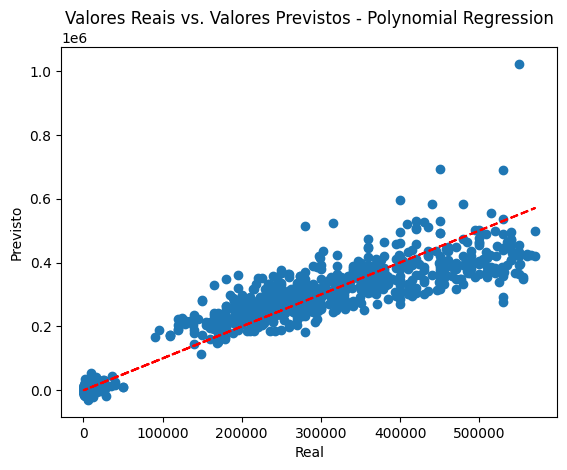

In [191]:
#Modelo de Regressão Polinomial
X = data_prepared
y = data_price
#dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#grau utilizado na regressão polinomial
degree = 2

#transformando os dados em uma matriz polinomial com o grau escolhido(2)
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

#criando e treinando um modelo de regressão polinomial(usa LinearRegression com os X obtidos no passo anterior)
model = LinearRegression()
model.fit(X_train_poly, y_train)

#recolhe os preços previstos utilizando o X de teste
y_pred = model.predict(X_test_poly)

#verificar o score do modelo
print(f'score: {model.score(X_test_poly,y_test)}')

#encontrar a raiz do erro medio quadratico
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'rmse: {rmse}')

#montar uma tabela comparativa dos prices previstos e dos prices reais
comparative_table_rf = pd.DataFrame({
    'Real': y_test,
    'Previsto': y_pred
})

print(comparative_table_rf)

# Adicionando a linha onde seria a posição ideal dos pontos
plt.plot(y_test, y_test, color='red', linestyle='--', label='Linha x=y')

plt.scatter(y_test, y_pred)
plt.xlabel("Real")
plt.ylabel("Previsto")
plt.title("Valores Reais vs. Valores Previstos - Polynomial Regression")
plt.show()
plt.show()

Árvore de Decisão: Embora a maioria das alterações que fizemos nos dados não interfiram nesse modelo, ainda assim decidimos utilizá-lo por ser um modelo que geralmente obtém ótimos resultados e que é flexível para diversas situações

Utilizamos max_depth 9 nesse modelo, novamente por ser o que obteve melhor resultado no teste manual.

score: 0.9399257067938637
rmse: 39438.117545103254
         Real       Previsto
8208   250000  370089.400000
5365     2300    3198.177632
2021     2100    2355.160000
5426     5400    4253.333333
5192     2200    1562.514754
...       ...            ...
8499   385000  252907.843137
10917   10000   16218.181818
10476    1105    1619.539720
1337     1200    1550.000000
9428     2500    2356.203125

[2000 rows x 2 columns]


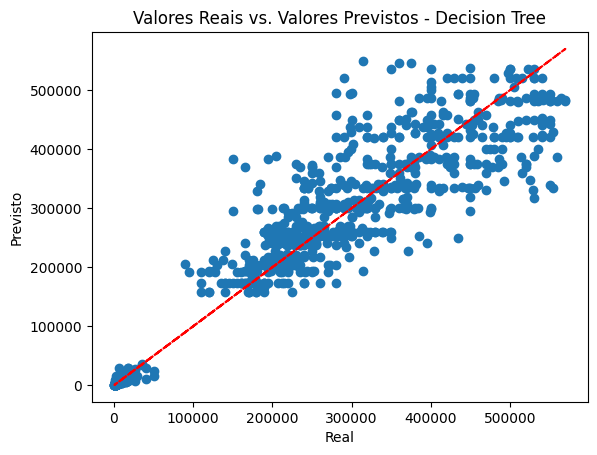

In [192]:
#Modelo de Árvore de Decisão
X = data_prepared
y = data_price
#dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#criando e treinando o modelo de arvore de decisao(usando max_depth 9 por ser o melhor número encontrado testes manuais)
tree_reg = DecisionTreeRegressor(random_state=42, max_depth = 9)
tree_reg.fit(X_train, y_train)

#recolhe os preços previstos utilizando o X de teste
y_pred = tree_reg.predict(X_test)


#verificar o score do modelo
print(f'score: {tree_reg.score(X_test,y_test)}')

#encontrar a raiz do erro medio quadratico
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'rmse: {rmse}')

#montar uma tabela comparativa dos prices previstos e dos prices reais
comparative_table_rf = pd.DataFrame({
    'Real': y_test,
    'Previsto': y_pred
})

print(comparative_table_rf)

# Adicionando a linha onde seria a posição ideal dos pontos
plt.plot(y_test, y_test, color='red', linestyle='--', label='Linha x=y')

plt.scatter(y_test, y_pred)
plt.xlabel("Real")
plt.ylabel("Previsto")
plt.title("Valores Reais vs. Valores Previstos - Decision Tree")
plt.show()
plt.show()


Random Forest: Como os resultados da Árvore de Decisão aparentaram mais promissores, decidimos utilizar como 3º modelo o RandomForest, que combina várias árvores de decisão a fim de obter um resultado mais interessante

No nosso caso, como não observamos mudanças significativas ao mudar o n_estimators para 50 ou para 200, por exemplo, deixamos ele no número 100 mesmo, fazendo assim com que 100 árvores sejam criadas para o modelo.

score: 0.9540335604687571
rmse: 34497.869490555015
         Real       Previsto
8208   250000  390690.030000
5365     2300    2743.560000
2021     2100    1884.150000
5426     5400    4447.900000
5192     2200    1973.749167
...       ...            ...
8499   385000  267635.000000
10917   10000   23073.000000
10476    1105    1434.250000
1337     1200    1564.700000
9428     2500    1922.720000

[2000 rows x 2 columns]


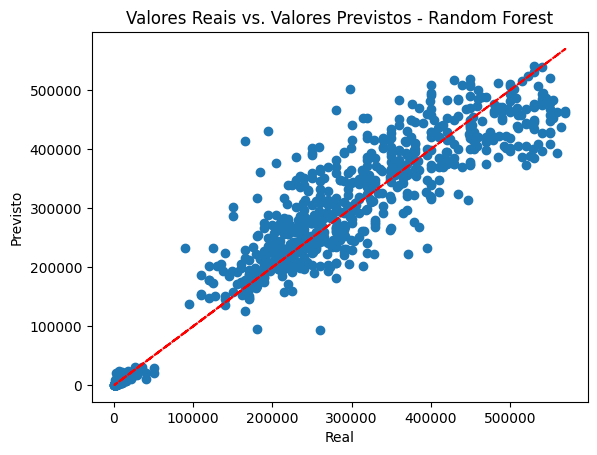

In [193]:
#Modelo de Random Forest
X = data_prepared
y = data_price
#dividindo os dados em conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#criando e treinando o modelo de Random Forest:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

#recolhe os preços previstos utilizando o X de teste
y_pred = rf_model.predict(X_test)

#verificar o score do modelo
print(f'score: {rf_model.score(X_test,y_test)}')

#encontrar a raiz do erro medio quadratico
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'rmse: {rmse}')

#montar uma tabela comparativa dos prices previstos e dos prices reais
comparative_table_rf = pd.DataFrame({
    'Real': y_test,
    'Previsto': y_pred
})

print(comparative_table_rf)

# Adicionando a linha onde seria a posição ideal dos pontos
plt.plot(y_test, y_test, color='red', linestyle='--', label='Linha x=y')

plt.scatter(y_test, y_pred)
plt.xlabel("Real")
plt.ylabel("Previsto")
plt.title("Valores Reais vs. Valores Previstos - Random Forest")
plt.show()
plt.show()


Por fim, analisando visualmente os gráficos plotados e confirmando a análise por meio dos R2 e RMSE de cada modelo, podemos perceber que o modelo que desempenhou melhor o papel de prever o preço dentre os 3 modelos utilizados foi o RandomForest

# Conclusão

Com isso terminamos nossa apresentação e do projeto de "ponta a ponta", em que começamos com a limpeza do dataset, passando para a análise dos dados terminando com a escolha e análise de modelos.